# Plot für Datenportal

Wir laden in einem ersten Schritt die Daten:

In [9]:
import transformers
print(transformers.__version__)

4.43.1


In [2]:
# Lade Pakete
import numpy as np
import pandas as pd
import os

# Lade Daten
os.chdir('c:/Users/Hueck/OneDrive/Dokumente/GitHub/future_skill_classification/')
df_hex_sample = pd.read_csv('data/hex_classified_fs_with_lernziele.csv')

Wir kodieren im folgenden, ob eine Zeile zu MINT oder zu nicht-Mint zu zählen ist. Trifft beides zu, wird per Zufall die Zuteilung vorgenommen. 

In [ ]:
# Funktion zur Codierung mit zufälliger Auswahl für bestimmte Kombinationen von Fächergruppen: Wenn eine zeile je mindestens eine Fächergruppe pro MINT/nicht-MINT hat: Weise per Zufall zu!
def assign_mint_label(faechergruppe):
    if isinstance(faechergruppe, str):
        # Kategorien für MINT und Nicht-MINT
        mint_categories = ["Mathematik", "Naturwissenschaften", "Ingenieurwissenschaften"]
        non_mint_categories = [
            "Geisteswissenschaften", "Rechts-, Wirtschafts- und Sozialwissenschaften",
            "Humanmedizin", "Gesundheitswissenschaften", "Kunst", 
            "Agrar-, Forst- und Ernährungswissenschaften", "Veterinärmedizin", "Sport"
        ]

        # Prüfen, ob MINT- und Nicht-MINT-Kategorien beide in faechergruppe vorkommen
        has_mint = any(mint in faechergruppe for mint in mint_categories)
        has_non_mint = any(non_mint in faechergruppe for non_mint in non_mint_categories)

        if has_mint and has_non_mint:
            # Zufällige Zuordnung, wenn beide Kategorien vorhanden sind
            return np.random.choice(["MINT", "nicht MINT"])
        elif has_mint:
            return "MINT"
        elif has_non_mint:
            return "nicht MINT"
        else:
            return "NA"  # Wenn Kategorie nicht eindeutig identifizierbar ist
    else:
        return "NA"  # NA für fehlende Werte

# Anwenden der Funktion auf die Spalte
df_hex_sample['mint_faechergruppe'] = df_hex_sample['faechergruppe'].apply(assign_mint_label)

jahr
2017    2.741832
2018    2.905829
2019    3.155706
2020    3.245751
2021    3.359812
2022    3.665146
Name: FS_Skill, dtype: float64


In [7]:
# Jahr-Spalte in Integer umwandeln und dann den Filter anwenden
df_hex_sample['jahr'] = df_hex_sample['jahr'].astype(int)
df_hex_sample = df_hex_sample[df_hex_sample['mint_faechergruppe'] != "NA"]


# Filter für den Zeitraum 2017-2022 und Berechnung des Prozentsatzes von Zeilen mit einem FS_Skill pro Jahr und mint_faechergruppe
fs_skill_percentage_by_year_mint = (
    df_hex_sample[df_hex_sample['jahr'].between(2017, 2022)]
    .groupby(['jahr'])['FS_Skill']
    .apply(lambda x: x.notna().mean() * 100)
)

# Ergebnis anzeigen
print(fs_skill_percentage_by_year_mint)

# Jahr-Spalte in Integer umwandeln und dann den Filter anwenden
df_hex_sample['jahr'] = df_hex_sample['jahr'].astype(int)

# Filter für den Zeitraum 2017-2022 und Berechnung des Prozentsatzes von Zeilen mit einem FS_Skill pro Jahr und mint_faechergruppe
fs_skill_percentage_by_year_mint = (
    df_hex_sample[df_hex_sample['jahr'].between(2017, 2022)]
    .groupby(['jahr', 'mint_faechergruppe'])['FS_Skill']
    .apply(lambda x: x.notna().mean() * 100)
)

# Ergebnis anzeigen
print(fs_skill_percentage_by_year_mint)

jahr
2017    2.741832
2018    2.905829
2019    3.155706
2020    3.245751
2021    3.359812
2022    3.665146
Name: FS_Skill, dtype: float64
jahr  mint_faechergruppe
2017  MINT                  7.065992
      nicht MINT            0.639590
2018  MINT                  7.255997
      nicht MINT            0.662399
2019  MINT                  7.585132
      nicht MINT            0.766465
2020  MINT                  7.630905
      nicht MINT            0.805866
2021  MINT                  7.715108
      nicht MINT            0.878578
2022  MINT                  8.091705
      nicht MINT            1.034239
Name: FS_Skill, dtype: float64


jahr  mint_faechergruppe
2017  MINT                  7.065992
      nicht MINT            0.639590
2018  MINT                  7.255997
      nicht MINT            0.662399
2019  MINT                  7.585132
      nicht MINT            0.766465
2020  MINT                  7.630905
      nicht MINT            0.805866
2021  MINT                  7.715108
      nicht MINT            0.878578
2022  MINT                  8.091705
      nicht MINT            1.034239
Name: FS_Skill, dtype: float64


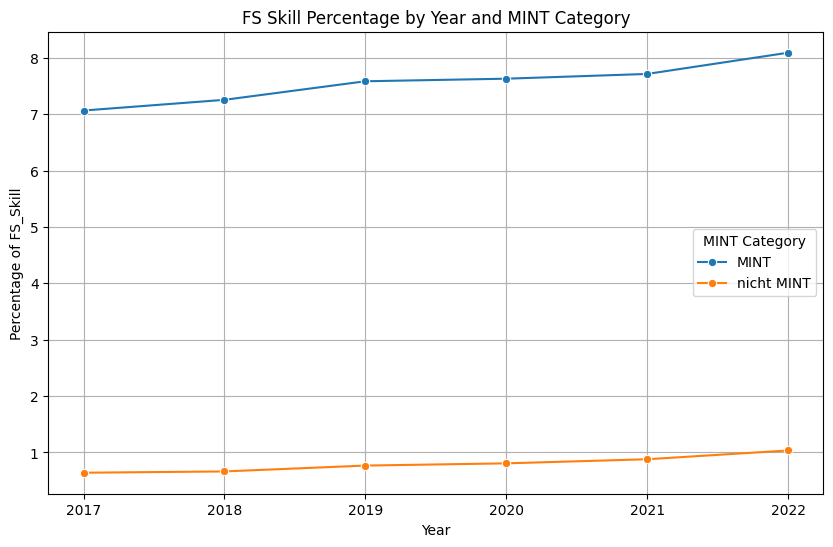

In [8]:
# Ergebnis anzeigen
print(fs_skill_percentage_by_year_mint)


# Erzeuge Lineplot
import seaborn as sns
import matplotlib.pyplot as plt

fs_skill_percentage_by_year_mint = fs_skill_percentage_by_year_mint.reset_index()

# Plot erstellen
plt.figure(figsize=(10, 6))
sns.lineplot(data=fs_skill_percentage_by_year_mint, x='jahr', y='FS_Skill', hue='mint_faechergruppe', marker='o')

# Plot-Anpassungen
plt.xlabel('Year')
plt.ylabel('Percentage of FS_Skill')
plt.title('FS Skill Percentage by Year and MINT Category')
plt.legend(title='MINT Category')
plt.grid(True)

plt.show()